# Importing, checking and splitting Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [3]:
NBA_train = pd.read_csv('nba_train.csv')
NBA_train.head(5)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


Dividing X and Y Columns 

In [5]:
X = NBA_train.drop(['TARGET_5Yrs'], axis=1)
y = NBA_train['TARGET_5Yrs']

Splitting the Dataset

In [8]:
# Split the NBA_train dataset into train and validation dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 20)
Shape of X_test: (1600, 20)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


# Modelling

Access Baseline Model

In [9]:
# Find the mode of the target variable from the training set and print its value
y_mode = y_train.mode()
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

In [10]:
# Create a numpy array with the same dimensions as for the training set called y_base filled with this value
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

In [11]:
# Import the accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [12]:
# Display the accuracy score of this baseline model on the training set
accuracy_score(y_train, y_base)

0.8321875

# Logistic Regression Model - Training Set:

In [17]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [18]:
logreg.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
logreg.predict(X[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
logreg.predict_proba(X[0:10])

array([[0.07553812, 0.92446188],
       [0.05307813, 0.94692187],
       [0.10471522, 0.89528478],
       [0.1266113 , 0.8733887 ],
       [0.12897223, 0.87102777],
       [0.05897692, 0.94102308],
       [0.07222756, 0.92777244],
       [0.19731306, 0.80268694],
       [0.18985588, 0.81014412],
       [0.03885109, 0.96114891]])

In [21]:
logreg.score(X, y)

0.833625

In [22]:
logreg.score(X_train, y_train)

0.83234375

Plot the confusion matrics for the training set for Logistic Regression model

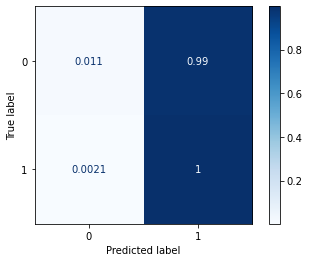

In [62]:
ConfusionMatrixDisplay.from_estimator(logreg, X_train, y_train, cmap=plt.cm.Blues, normalize='true')


# Random Forest Model - Training Set

In [49]:
rf = RandomForestRegressor(random_state=8)

In [52]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=8)

In [55]:
rf = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_train, y_train)
print(rf.score(X_train, y_train))

0.99953125


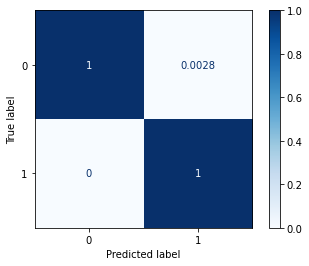

In [56]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, cmap=plt.cm.Blues, normalize='true')

# Models Comparison - Test sets and predictions

In [45]:
# Create models dictionary
models = {"KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}

# Define function that will evaluate the model performance using various metrics
def evaluate_pred(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    metric_dict = {"Accuracy": round(accuracy, 4), "Precision": round(precision, 4), "Recall": round(recall, 4), "F1": round(f1,4), "ROC_AUC": round(roc_auc,4)}

    return metric_dict

# Define function that will fit and evaluate the models
def fit_and_eval(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    # Dictionary of model scores
    model_scores = {}
    model_metrics = {}
    results = {}
    
    # Loop through models
    for name, model in models.items():
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)[:,1]
        results[name] = { "Score":model.score(X_test, y_test), "Model_Metrics":evaluate_pred(y_test, y_pred, y_pred_prob) }

        # Print the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({name})')
        plt.show()
    
    return results

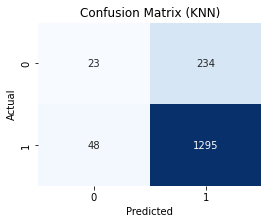

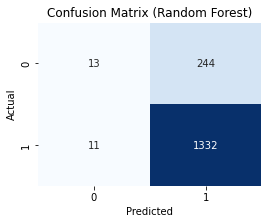

C:\Users\redha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


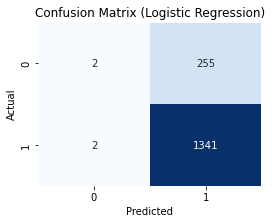

{'KNN': {'Score': 0.82375,
  'Model_Metrics': {'Accuracy': 0.8238,
   'Precision': 0.847,
   'Recall': 0.9643,
   'F1': 0.9018,
   'ROC_AUC': 0.5688}},
 'Random Forest': {'Score': 0.840625,
  'Model_Metrics': {'Accuracy': 0.8406,
   'Precision': 0.8452,
   'Recall': 0.9918,
   'F1': 0.9126,
   'ROC_AUC': 0.6621}},
 'Logistic Regression': {'Score': 0.839375,
  'Model_Metrics': {'Accuracy': 0.8394,
   'Precision': 0.8402,
   'Recall': 0.9985,
   'F1': 0.9126,
   'ROC_AUC': 0.6939}}}

In [46]:
model_fit_results = fit_and_eval(models, X_train, X_test, y_train, y_test)
model_fit_results

In [63]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(model_fit_results, orient='index')

# Reset the index (optional)
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Flatten the nested dictionary inside 'Model_Metrics'
results_df = pd.concat([results_df.drop(['Model_Metrics'], axis=1), results_df['Model_Metrics'].apply(pd.Series)], axis=1)

print(results_df)

                 Model     Score  Accuracy  Precision  Recall      F1  ROC_AUC
0                  KNN  0.823750    0.8238     0.8470  0.9643  0.9018   0.5688
1        Random Forest  0.840625    0.8406     0.8452  0.9918  0.9126   0.6621
2  Logistic Regression  0.839375    0.8394     0.8402  0.9985  0.9126   0.6939
